In [2]:
import osmnx as ox
import networkx as nx
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline
ox.__version__
ox.settings.log_console=True

# Netzwerkgraphen erzeugen

In [3]:
# modify the place name and desired network types
place = "Hoerde, Dortmund, Germany"
place_short = "Hoerde"

G_BIKE = ox.graph_from_place(place, network_type="bike")
G_DRIVE = ox.graph_from_place(place, network_type="drive")
G_WALK = ox.graph_from_place(place, network_type="walk")
G_FULL = ox.graph_from_place(place, network_type="all")
graphs = {"bike": G_BIKE,
          "car": G_DRIVE,
          "foot": G_WALK,
          "full": G_FULL}

## Zentralität und Netzwerkstrukturen

### Berechnung der Zentralität

In [4]:
# convert graph to line graph so edges become nodes and vice versa
for graph in tqdm(graphs.values()):
    edge_centrality = nx.closeness_centrality(nx.line_graph(graph))
    nx.set_edge_attributes(graph, edge_centrality, "edge_centrality")

100%|██████████| 4/4 [05:26<00:00, 81.52s/it] 


### Darstellung als Graph

100%|██████████| 4/4 [00:10<00:00,  2.75s/it]


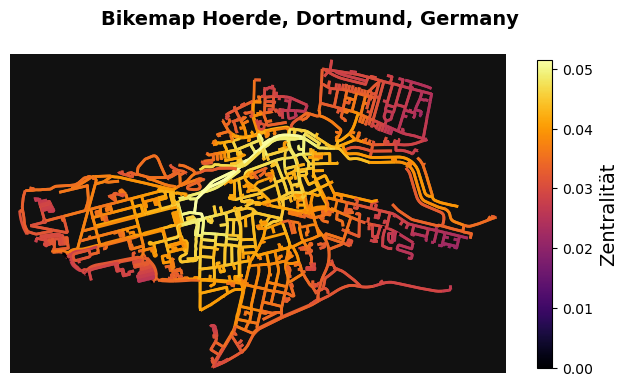

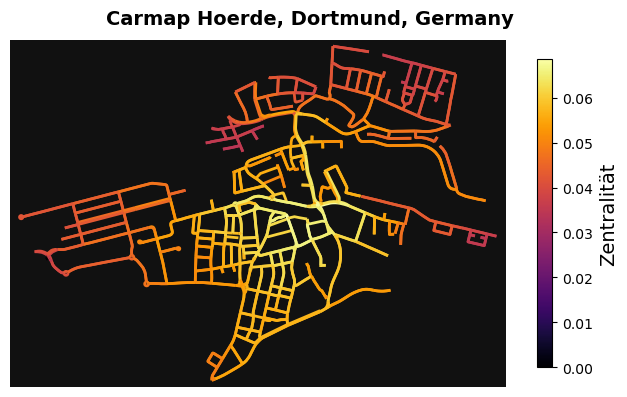

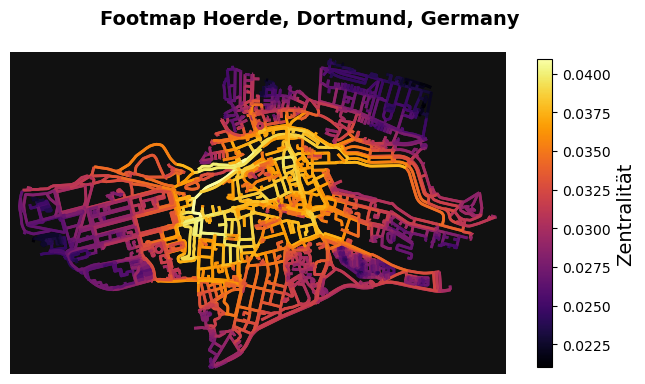

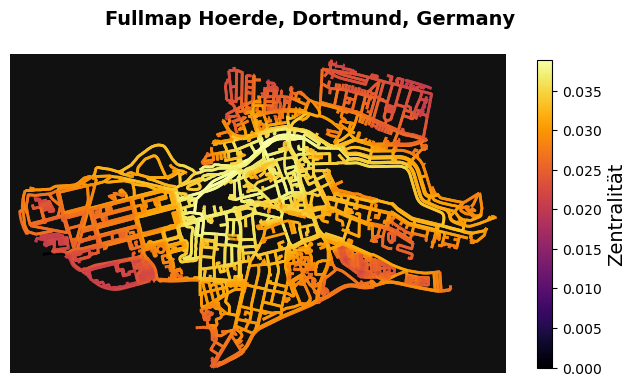

In [5]:
for name, graph in tqdm(graphs.items()):
    outpath = f'./output_data/images/{place_short}_{name}_edge_centrality.png'

    # create a legend for the edge colors
    nodes, edges = ox.graph_to_gdfs(graph, nodes=True, edges=True)  # Transforms nodes and edges into Geodataframes"
    cmap = plt.cm.get_cmap('inferno')
    norm = plt.Normalize(vmin=edges['edge_centrality'].min(), vmax=edges['edge_centrality'].max())    
    sm = cm.ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])

    # color edges in original graph with closeness centralities from line graph
    ec = ox.plot.get_edge_colors_by_attr(graph, "edge_centrality", cmap=cmap)
    fig, ax = ox.plot_graph(graph, edge_color=ec, edge_linewidth=2, node_size=0, close=False, show=False)
    
    # set title, adjust y position
    fig.suptitle(f'{name.capitalize()}map {place}', fontsize=14, fontweight='bold', y=0.75)

    # colorbar
    cb = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='vertical', shrink=0.5)
    cb.set_label('Zentralität', fontsize = 14)
    
    fig.savefig(outpath, dpi=600, bbox_inches='tight')

## Speichern der Netzwerke

In [6]:

# save street network as GeoPackage to work with in GIS
for network_type, graph in tqdm(graphs.items()):
    place_name = place.split(",")[0].lower()
    outpath = f'./output_data/gpkg/{place_name}_{network_type}_network.gpkg'
    ox.save_graph_geopackage(graph, filepath=outpath)

100%|██████████| 4/4 [00:14<00:00,  3.59s/it]
